In [1]:
from data import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklego.meta import ZeroInflatedRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import explained_variance_score

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

In [2]:
df = read_data(is_small=False) 

df_X = df.drop(columns=['tot_crash_count', 'crash'])
df_y = df['tot_crash_count']

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

zir = ZeroInflatedRegressor(
    classifier=RandomForestClassifier(random_state=1, n_jobs=-1),
    regressor=RandomForestRegressor(random_state=1, n_jobs=-1)
)

In [3]:
zir.fit(X_train, y_train)

ZeroInflatedRegressor(classifier=RandomForestClassifier(n_jobs=-1,
                                                        random_state=1),
                      regressor=RandomForestRegressor(n_jobs=-1,
                                                      random_state=1))

In [4]:
y_val_pred = zir.predict(X_val)

In [17]:
print('r2_score train:', r2_score(y_train, zir.predict(X_train)))
print('root mean_squared_error:', mean_squared_error(y_val, y_val_pred, squared=False))
print('r2_score val:', r2_score(y_val, y_val_pred))
#zir.score(X_val, y_val) # r2_score

r2_score train: 0.9439762450242799
root mean_squared_error: 11.637687875197132
r2_score val: 0.46685687420923716


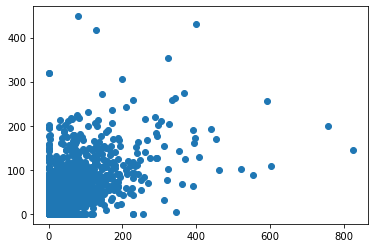

In [6]:
plt.scatter(y_val, y_val_pred)

In [7]:
# random forest regression
rf_reg = RandomForestRegressor(random_state=1, n_jobs=-1)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=1)

In [16]:
print('r2_score train:', r2_score(y_train, rf_reg.predict(X_train)))
print('root mean_squared_error:', mean_squared_error(y_val, rf_reg.predict(X_val), squared=False))
print('r2_score val:', r2_score(y_val, rf_reg.predict(X_val)))

r2_score train: 0.9338556600204282
root mean_squared_error: 11.41522665590214
r2_score val: 0.4870447468825251


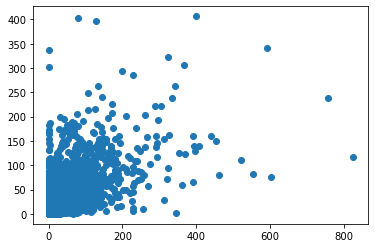

In [9]:
plt.scatter(y_val, rf_reg.predict(X_val))

In [10]:
importances = rf_reg.feature_importances_
indices = np.argsort(importances)
features = list(X_train.columns)

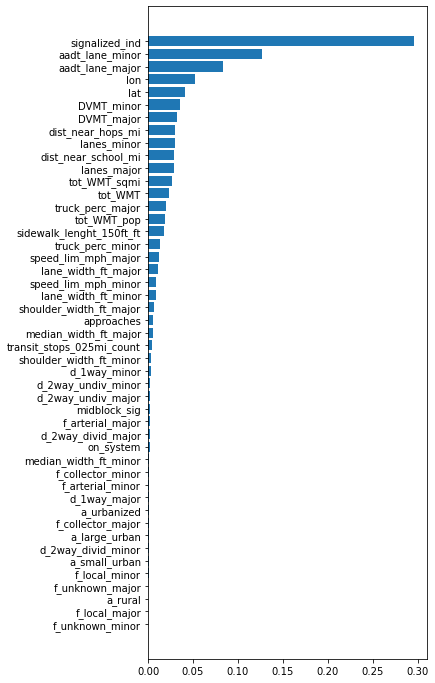

In [11]:
plt.figure(figsize=(5,12))
plt.barh(range(len(indices)), importances[indices]);
plt.yticks(range(len(indices)), [features[i] for i in indices]);

In [19]:
# try another parameter for random forest regression
rf_reg = RandomForestRegressor(random_state=1, n_jobs=-1, n_estimators=500)
rf_reg.fit(X_train, y_train)

print('r2_score train:', r2_score(y_train, rf_reg.predict(X_train)))
print('root mean_squared_error:', mean_squared_error(y_val, rf_reg.predict(X_val), squared=False))
print('r2_score val:', r2_score(y_val, rf_reg.predict(X_val)))

r2_score train: 0.935907360213502
root mean_squared_error: 11.374351940271264
r2_score val: 0.4907116669442493
